-----------------------------------------------------------------------------------------------------------------------
# **Employee Attrition Prediction**
-----------------------------------------------------------------------------------------------------------------------

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


------------------------------------
## **Dataset Description**
------------------------------------


* **EmployeeID** - Unique employee identification 
* **Attrition** - Did the employee attrite or not?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available
* **Department** - Employee's Department
* **DistanceFromHome** - Distance from work to home (in KM)
* **Education** - Employee's Education. 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Whether the employee is over 18 years of age?
* **OverTime** - Whether the employee is doing overtime?
* **PercentSalaryHike** - The percentage increase in the salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager


## **Importing the required libraries**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
import tqdm as tqdm

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score, accuracy_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the Dataset**

In [ ]:
#Load the data 
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload() # Use to load data on Google Colab

Saving watson_healthcare_modified.csv to watson_healthcare_modified.csv


In [ ]:
#Creating a dataframe
df=pd.read_csv('watson_healthcare_modified.csv')

In [ ]:
# Looking at the first 5 records
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Checking the info of the dataset**

In [ ]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

**Observations:**

- There are **1676 observations and 35 columns** in the dataset.
- All the columns have 1676 non-null values, i.e., **there are no missing values in the data.**

Q1-What are the datatypes?

In [ ]:
df.dtypes

Age                                 int64
Attrition                           int64
DailyRate                           int64
DistanceFromHome                    int64
Education                           int64
EmployeeCount                       int64
EnvironmentSatisfaction             int64
HourlyRate                          int64
JobInvolvement                      int64
JobLevel                            int64
JobSatisfaction                     int64
MonthlyIncome                       int64
MonthlyRate                         int64
NumCompaniesWorked                  int64
OverTime                            int64
PercentSalaryHike                   int64
PerformanceRating                   int64
RelationshipSatisfaction            int64
Shift                               int64
TotalWorkingYears                   int64
TrainingTimesLastYear               int64
WorkLifeBalance                     int64
YearsAtCompany                      int64
YearsInCurrentRole                

In [ ]:
# Checking the count of unique values in each column
df.nunique()

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
# Dropping the columns
df = df.drop(['EmployeeID', 'Over18', 'StandardHours'] , axis = 1)

In [ ]:
# Creating numerical columns
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears', 
            'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
            'YearsWithCurrManager', 'TrainingTimesLastYear']

# Creating categorical variables
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction', 'EnvironmentSatisfaction', 
            'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

In [ ]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1676.0,800.557876,401.594438,102.0,465.00,796.5,1157.00,1499.0
Age,1676.0,36.866348,9.129126,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,1676.0,9.221957,8.158118,1.0,2.00,7.0,14.00,29.0
MonthlyIncome,1676.0,6516.512530,4728.456618,1009.0,2928.25,4899.0,8380.25,19999.0
MonthlyRate,1676.0,14287.019690,7138.857783,2094.0,7993.00,14269.5,20462.00,26999.0
PercentSalaryHike,1676.0,15.196897,3.646550,11.0,12.00,14.0,18.00,25.0
TotalWorkingYears,1676.0,11.338902,7.834996,0.0,6.00,10.0,15.00,40.0
YearsAtCompany,1676.0,7.033413,6.098991,0.0,3.00,5.0,10.00,40.0
NumCompaniesWorked,1676.0,2.662291,2.477704,0.0,1.00,2.0,4.00,9.0
HourlyRate,1676.0,65.470167,20.207572,30.0,48.00,65.5,83.00,100.0


Q2- Are there missing values?

In [ ]:
df.isnull().sum()

Age                                 0
Attrition                           0
DailyRate                           0
DistanceFromHome                    0
Education                           0
EmployeeCount                       0
EnvironmentSatisfaction             0
HourlyRate                          0
JobInvolvement                      0
JobLevel                            0
JobSatisfaction                     0
MonthlyIncome                       0
MonthlyRate                         0
NumCompaniesWorked                  0
OverTime                            0
PercentSalaryHike                   0
PerformanceRating                   0
RelationshipSatisfaction            0
Shift                               0
TotalWorkingYears                   0
TrainingTimesLastYear               0
WorkLifeBalance                     0
YearsAtCompany                      0
YearsInCurrentRole                  0
YearsSinceLastPromotion             0
YearsWithCurrManager                0
BusinessTrav

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data

Q3- What are the likely distributions of numeric variables?

<Figure size 576x360 with 0 Axes>

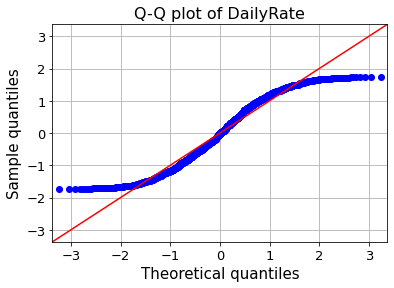

<Figure size 576x360 with 0 Axes>

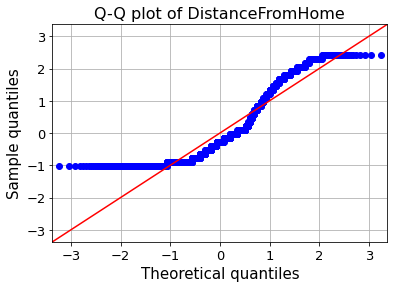

<Figure size 576x360 with 0 Axes>

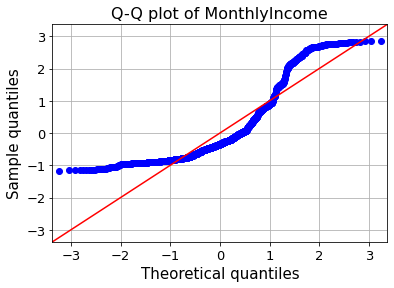

<Figure size 576x360 with 0 Axes>

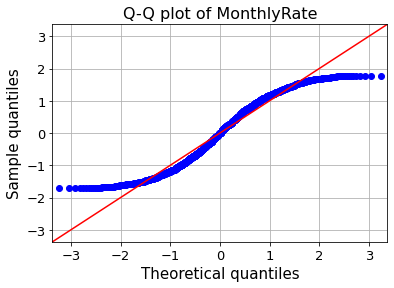

<Figure size 576x360 with 0 Axes>

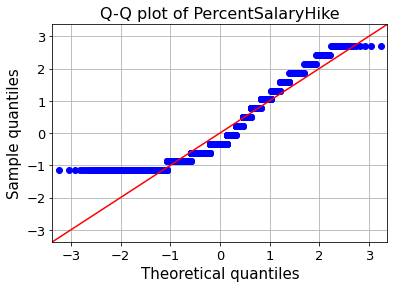

<Figure size 576x360 with 0 Axes>

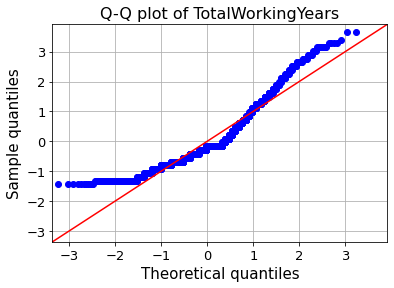

In [ ]:
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'TotalWorkingYears']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

In [ ]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,0.118735,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,0.312649,0.052506,0.088902,0.595465,0.463604,0.311456,0.068616,0.490453,0.318616,0.112768
std,9.129126,0.323573,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,0.463711,0.223112,0.284687,0.490948,0.498822,0.463227,0.252875,0.500058,0.466079,0.316404
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Above we get a general description of numeric data which mentions the mean, standard deviation, min value, max value etc. From this we can see that all values are positive.

Q- Do the ranges of the predictor variables make sense?
From the above description we can see that the distribution of the values makes sense.

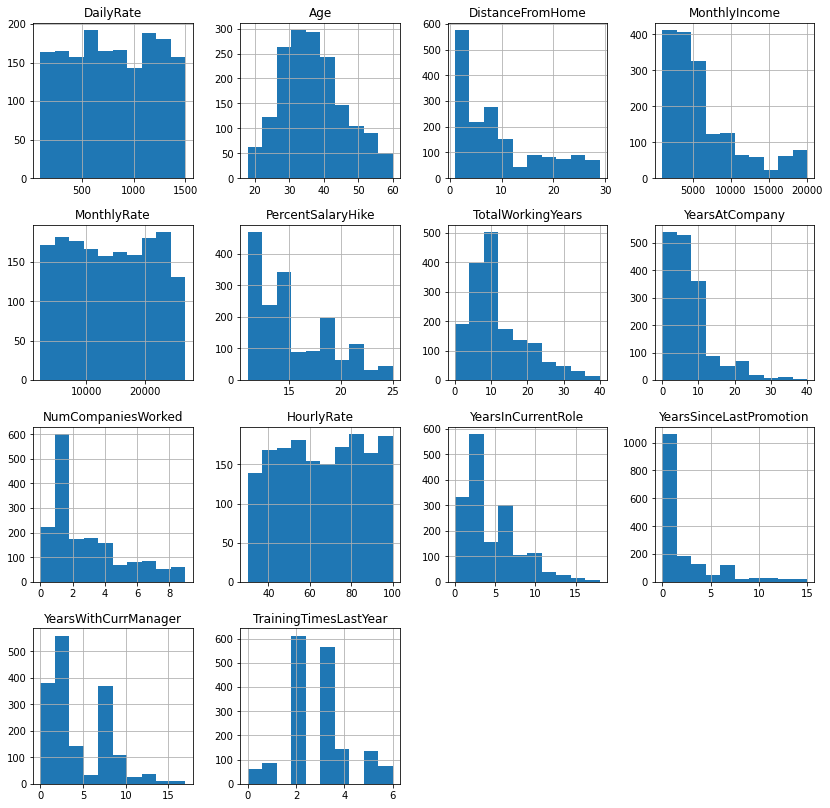

In [ ]:
# Creating histograms
df[num_cols].hist(figsize = (14, 14))

plt.show()

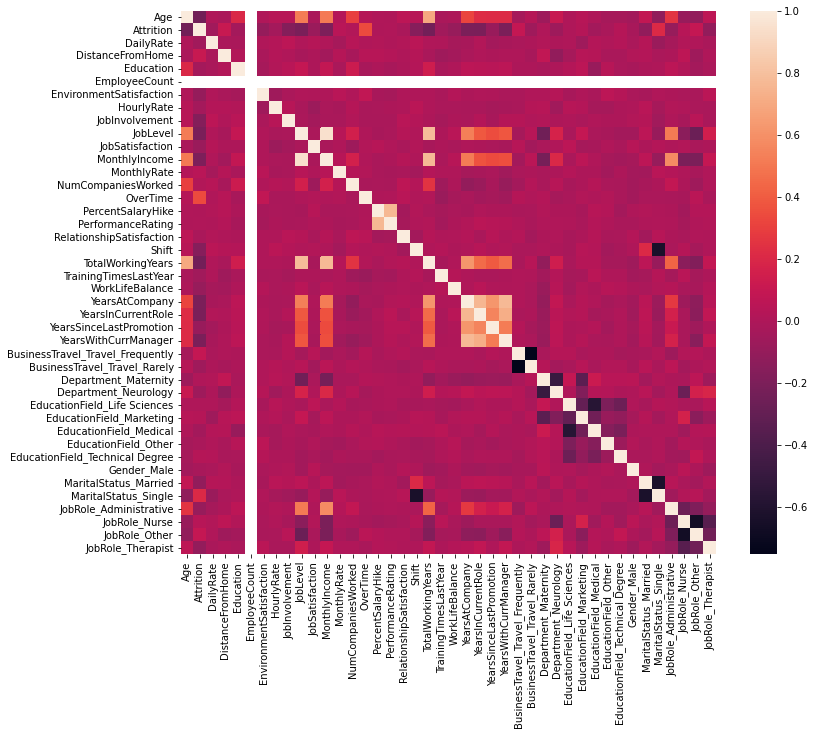

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor)
plt.show()

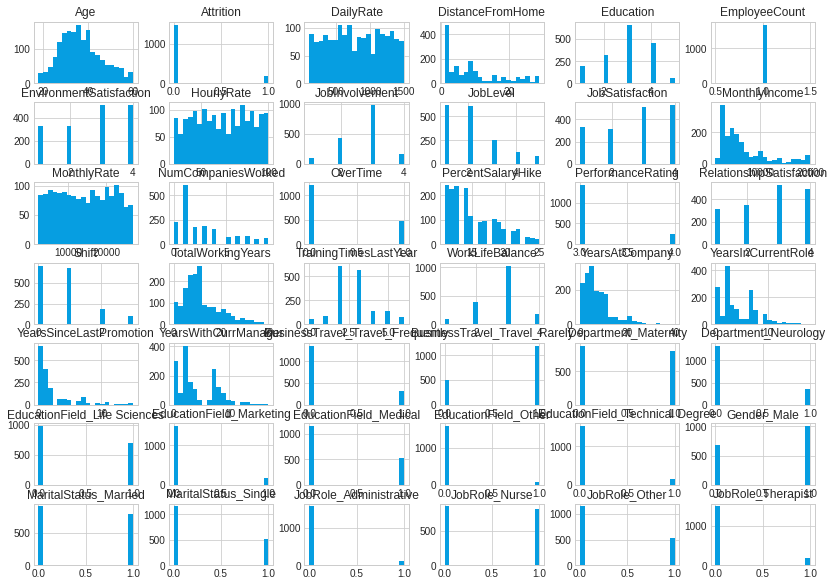

In [ ]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#069EE1')
plt.show();

In [ ]:
# Printing the % sub categories of each category.
for i in cat_cols:
    
    print(df[i].value_counts(normalize = True))
    
    print('*' * 40)

0    0.881265
1    0.118735
Name: Attrition, dtype: float64
****************************************
0    0.71599
1    0.28401
Name: OverTime, dtype: float64
****************************************


KeyError: ignored

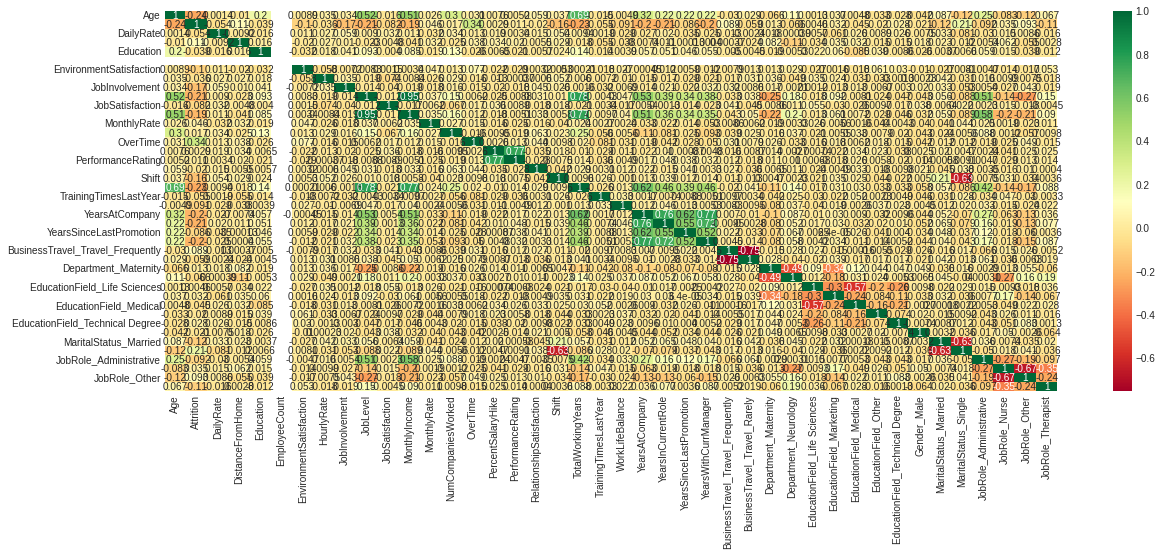

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

**Now that we have explored our data, let's build the model.**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for the categorical variables**

In [ ]:
# Creating a list of columns for which we will create dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'EducationField', 'MaritalStatus', 'JobRole']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No': 0}
dict_attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

KeyError: ignored

**Separating the independent variables (X) and the dependent variable (Y)**

In [ ]:
# Separating the target variable and other variables

Y = df.Attrition

X = df.drop(['Attrition'], axis = 1)

**Splitting the data into 70% train and 30% test set**

In [ ]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting an employee will attrite when the employee doesn't attrite
2. Predicting an employee will not attrite when the employee actually attrites

**Which case is more important?**

* **Predicting that the employee will not attrite but the employee attrites**, i.e., losing out on a valuable employee or asset. This would be considered a major miss for any employee attrition predictor and is hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can provide incentives to control the attrition rate especially, for top-performers. This would help in optimizing the overall project cost towards retaining the best talent.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [ ]:
# Creating metric function

def metrics_score(actual, predicted):
    
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Attriate', 'Attriate'], yticklabels = ['Not Attriate', 'Attriate'])
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

In [ ]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    
    predictors: independent variables
    
    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred,average = 'macro')                 # To compute recall
    
    precision = precision_score(target, pred, average = 'macro')              # To compute precision
               
    acc = accuracy_score(target, pred)                                 # To compute accuracy score
    

    # Creating a dataframe of metrics
    
    df_perf = pd.DataFrame(
        {
            "Precision":  precision,
            "Recall":  recall,
            "Accuracy": acc,
        },
        
        index = [0],
    )

    return df_perf

## **Building the model**

We will be building 2 different models:

- **Decision Tree**
- **Random Forest**


### **Building a Decision Tree Model**

* We will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17, 1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1034
           1       0.97      1.00      0.98       139

    accuracy                           1.00      1173
   macro avg       0.98      1.00      0.99      1173
weighted avg       1.00      1.00      1.00      1173



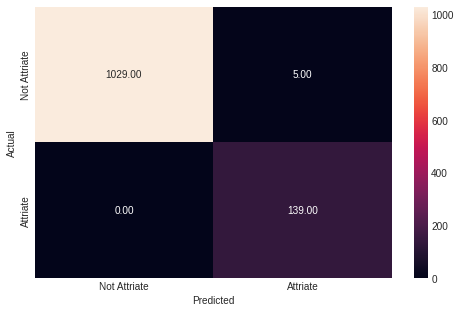

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.**

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       443
           1       0.49      0.53      0.51        60

    accuracy                           0.88       503
   macro avg       0.71      0.73      0.72       503
weighted avg       0.88      0.88      0.88       503



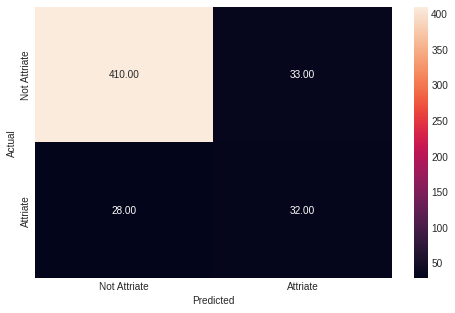

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_test = model_performance_classification(dt,x_test,y_test)
dtree_test

,Precision,Recall,Accuracy
0,0.71419,0.729421,0.878728


**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.83 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The precision on the test data suggests that there's a 25% (1 - 0.75) chance that the model will predict that a person is going to leave even though he/she would not, and **the company may waste their time and energy on these employees who are not at risk of attrition.**

**Let's plot the feature importance and check the most important features.**

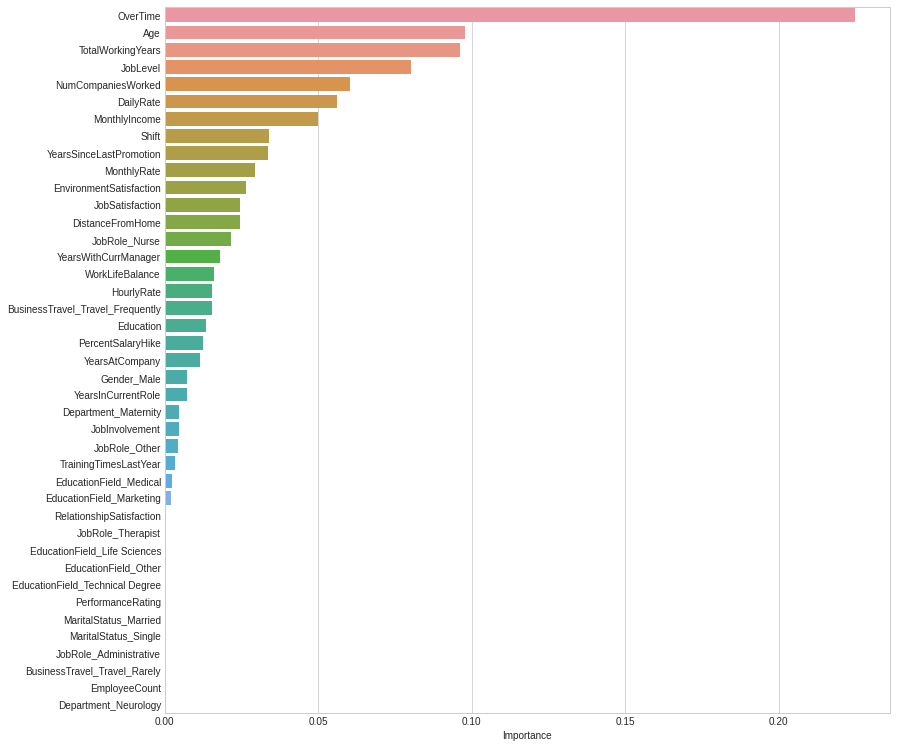

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**

- According to the Decision Tree, **Overtime is the most important feature, followed by Age, total working years, and Monthly income.** 
- This might signify that people who are at risk of attrition have low income, are doing overtime and have less experience. 
- The other important features are `DailyRate`, `DistanceFromHome`, `JobInvolvement`, and `PercentSalaryHike`.

**Let's try to tune the model and check if we could improve the results.**

### **Tuning Models**

In [ ]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=5, min_samples_leaf=5, random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1034
           1       0.56      0.95      0.70       139

    accuracy                           0.90      1173
   macro avg       0.77      0.92      0.82      1173
weighted avg       0.94      0.90      0.91      1173



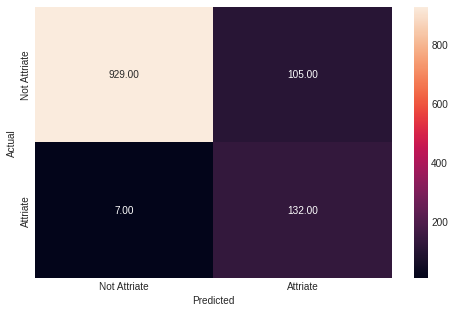

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- In comparison to the model with default values of hyperparameters, **the performance on the training set has gone down significantly.** This makes sense because we are trying to reduce overfitting.

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       443
           1       0.46      0.75      0.57        60

    accuracy                           0.86       503
   macro avg       0.71      0.82      0.74       503
weighted avg       0.90      0.86      0.88       503



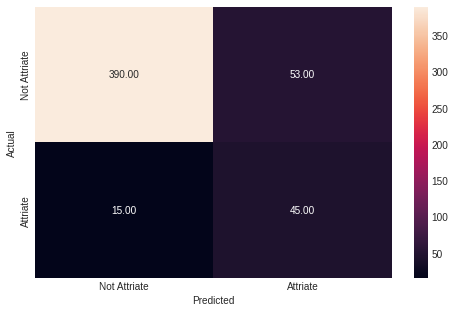

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [ ]:
dtree_tuned_test = model_performance_classification(dtree_estimator,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.711073,0.815181,0.864811


**Observations:**

- The tuned model is not performing well in comparison to the model with default values of hyperparameters.
- This model is not overfitting the training data and giving approximately the same result on the test and train datasets.
- Precision has gone down significantly in comparison to the previous model which means the tuned model will give a high number of false positives, i.e., this model will predict the employee is going to leave even if they won't, and this will cost time and effort to the company.

**Let's look at the feature importance of this model and try to analyze why this is happening.**

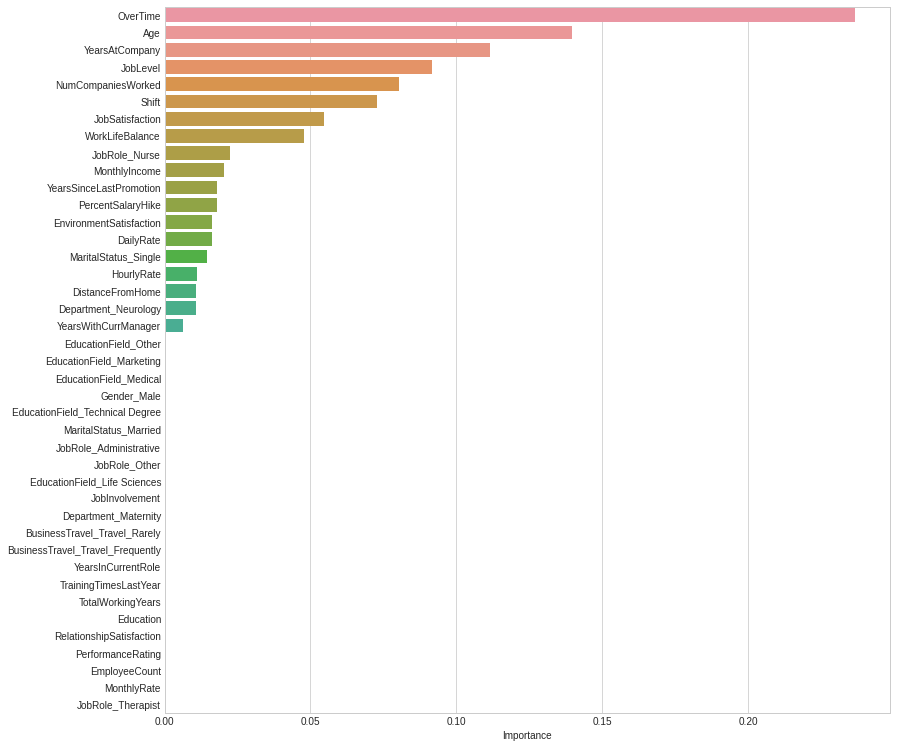

In [ ]:
importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- After tuning the model we are getting that only 3 features are important. It seems like **the model is having high bias**, as it has over-simplified the problem and is not capturing the patterns associated with other variables.
- According to this model too, `OverTime`, `TotalWorkingYears`, and `MonthlyIncome` are the 3 most important features that describe why an employee is leaving the organization.

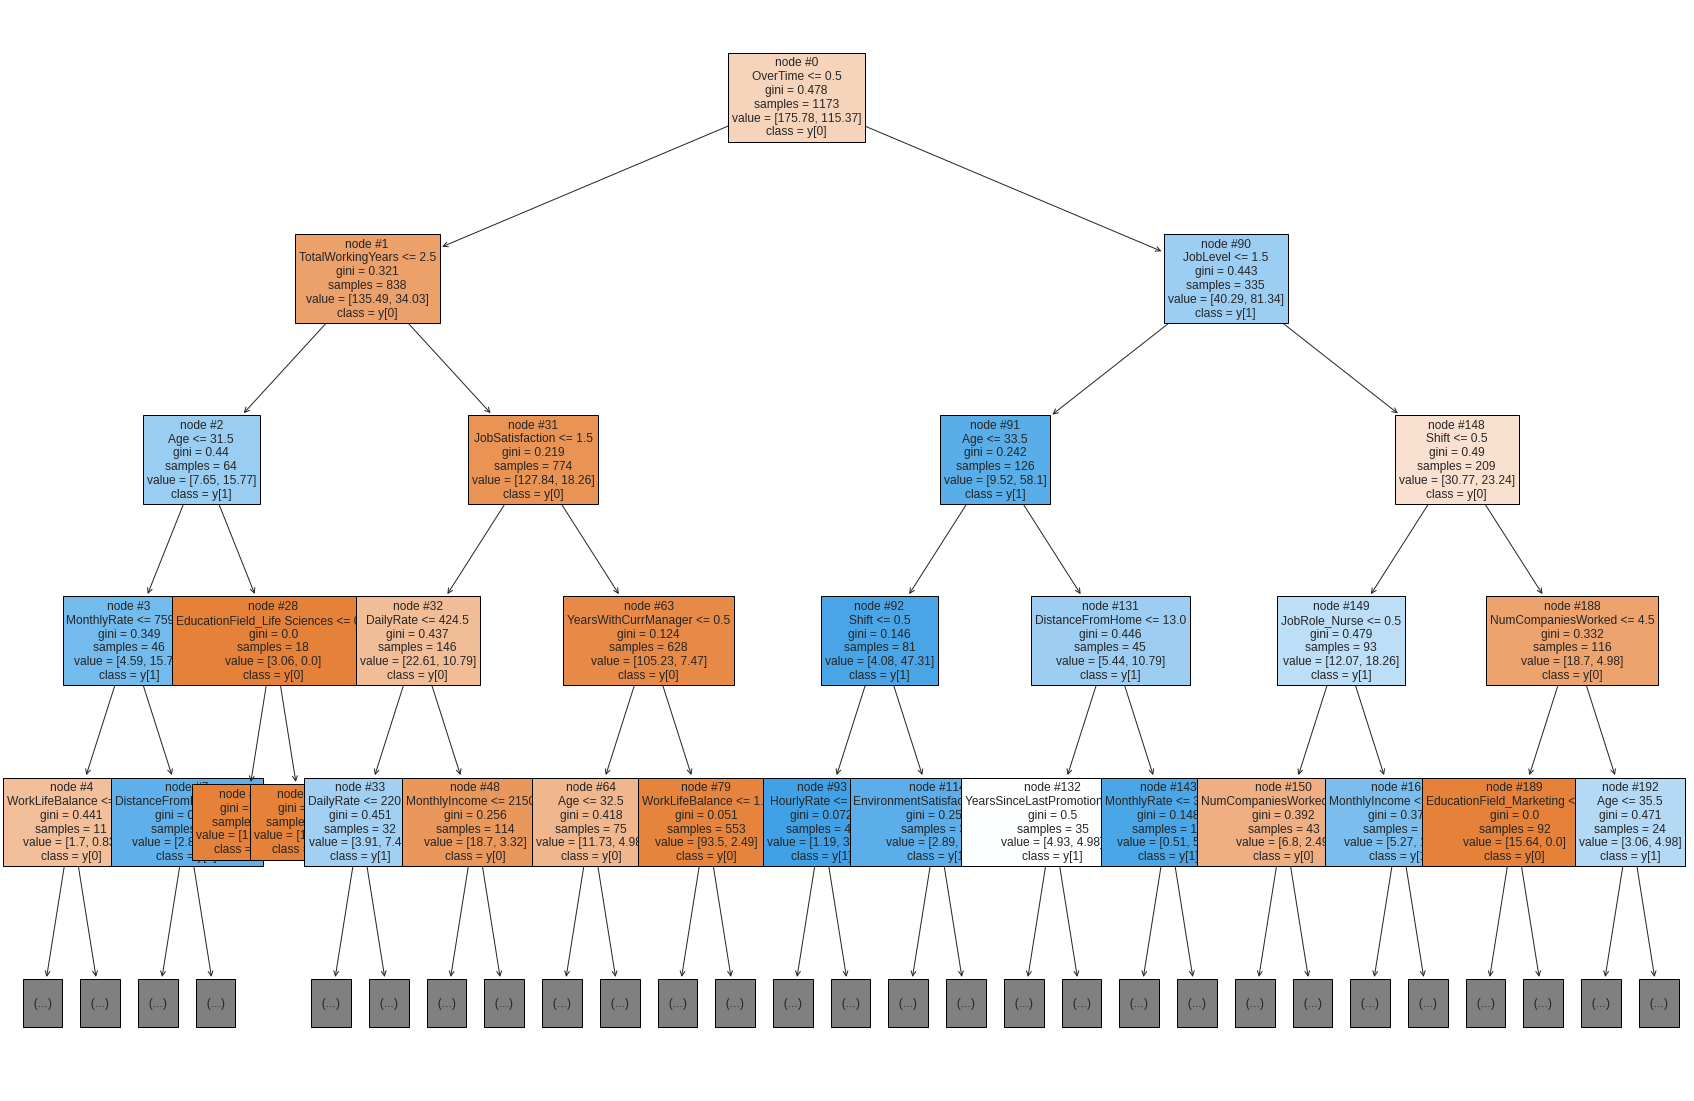

In [ ]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()


**Observations:**

- Employees who are doing overtime with low salaries and low age have a chance of leaving the company, as they might feel overworked and underpaid and might be looking for better opportunities.
- Employees who are doing overtime with low salaries have a high chance of attriting. 
- Employees who have over 2.5 years of work experience but low work-life balance and low percentage hike also tend to attrite, probably as they are seeking a more balanced life.
- Employees who are not doing overtime, have low experience have a smaller chance of attriting.
- `Numcompaniesworked` also seems to be an important variable in predicting if an employee's likely to attrite.

### **Building the Random Forest Classifier**


In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1034
           1       0.97      1.00      0.98       139

    accuracy                           1.00      1173
   macro avg       0.98      1.00      0.99      1173
weighted avg       1.00      1.00      1.00      1173



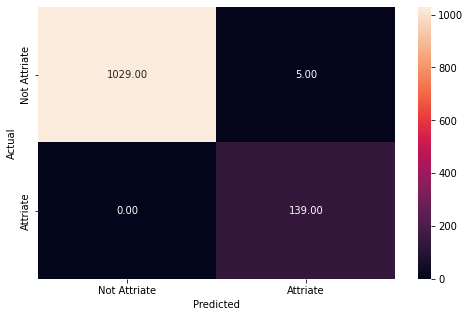

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**

- The Random Forest is giving a **100% score for all metrics on the training dataset.** 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       443
           1       0.78      0.30      0.43        60

    accuracy                           0.91       503
   macro avg       0.85      0.64      0.69       503
weighted avg       0.90      0.91      0.89       503



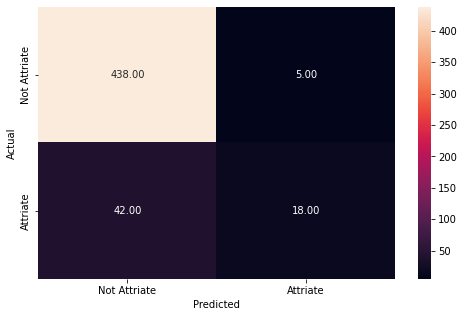

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

In [ ]:
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.847554,0.644357,0.906561


**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The recall on the training data is 1, while the recall on the test data is only ~ 0.80 for class 1.
- Precision is high for the test data as well. 

**Let's check the feature importance of the Random Forest**

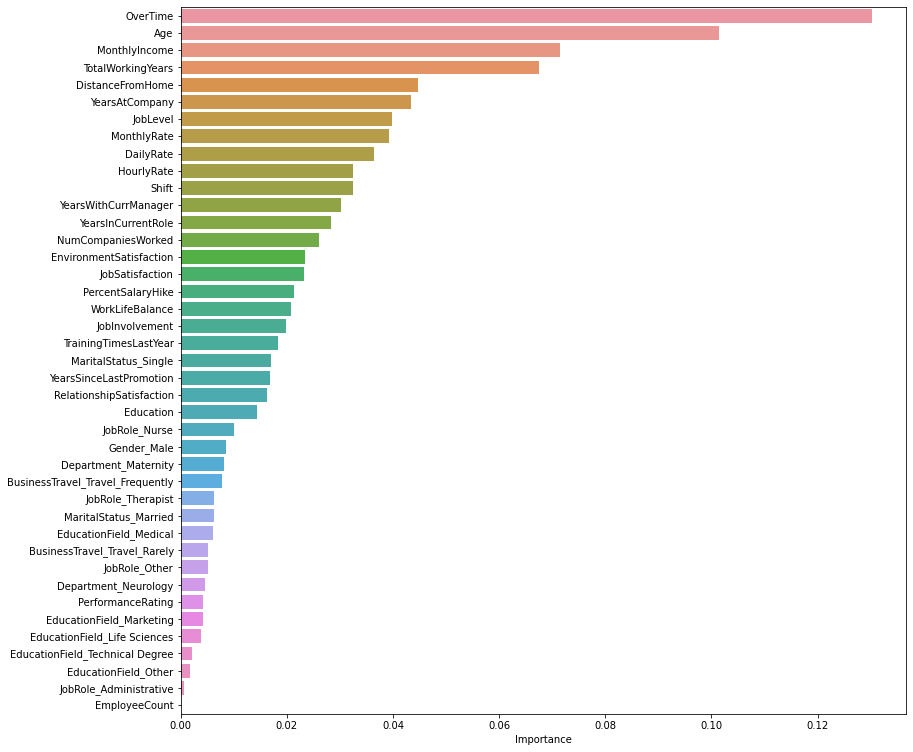

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**


- The Random Forest further verifies the results from the decision tree that the most important features are `MonthlyIncome`, `Age`, `OverTime`.
- We can say that the people appear to be leaving the organization because of the overtime they are doing andh s because they are not paid accordingly. These might be mostly junior-level and mid-level employees with less experience. 
- Distance from home is also a key feature, probably as employees living far from the office have to travel a lot, making their schedules hectic.
- Not having stock options is also a driver for attrition - this feature seems to have good importance in both the decision tree and random forest models. This could be related to the junior level employees and their lack of stock options - with the additional burden of a lower salary and working overtime, those without stock options could also be attriting more.
- Other features like, number of companies worked and percent salary hike also seem to be intuitive in explaining attrition likelihood, as people who have worked in a large number of companies are probably not going to stay loyal to the current organization and may have a high risk of attrition, while if an employee is not getting enough of a salary hike, that might demotivate them and lead to a higher likelihood of attriting as well.
- Other features such as job satisfaction, environment satisfaction and their job level also play a crucial role in knowing whether an employee will attrite or not.

### **Tuning the Random Forest classifier**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [100, 250, 500],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_features=0.9,
                       min_samples_leaf=3, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1034
           1       0.90      0.99      0.95       139

    accuracy                           0.99      1173
   macro avg       0.95      0.99      0.97      1173
weighted avg       0.99      0.99      0.99      1173



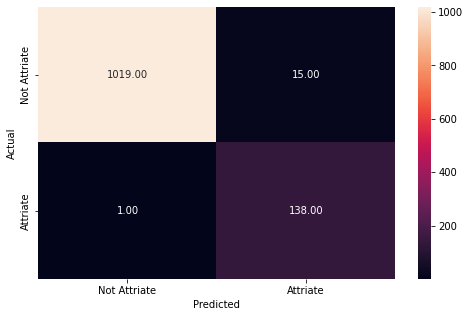

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       443
           1       0.71      0.50      0.59        60

    accuracy                           0.92       503
   macro avg       0.82      0.74      0.77       503
weighted avg       0.91      0.92      0.91       503



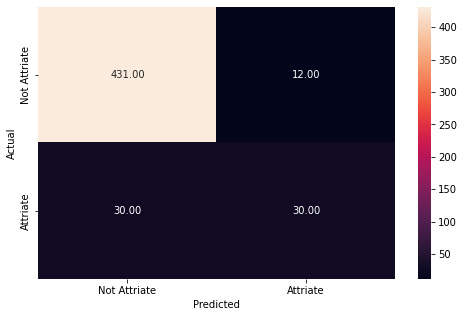

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [ ]:
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.824605,0.736456,0.916501


**Observations:**

- The tuned model is also slightly overfitting the training dataset, but **it shows a good performance on the test dataset.**
- **The recall for class 1 has improved with a small decrease in precision**. 
- **This model is the best-performing one among all the models so far,** and is giving us good precision and recall scores on the test dataset.

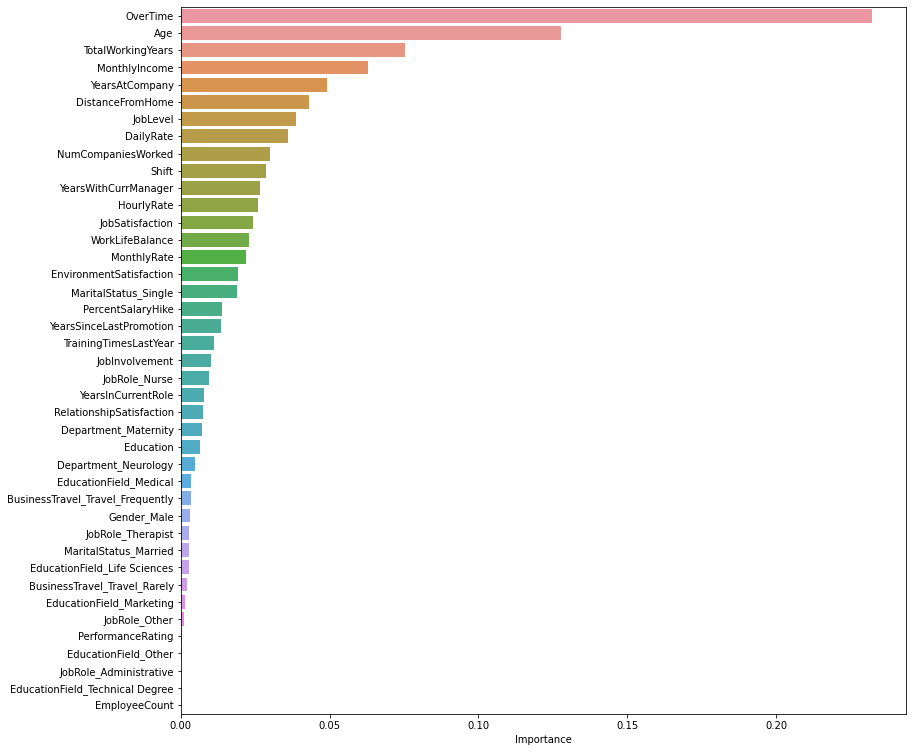

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- **The feature importance plot for the base model and tuned model are quite similar.** The model seems to suggest that `OverTime`, `MonthlyIncome`, `Age`,`TotalWorkingYears`, and `DailyRate` are the most important features.
- Other important features are DistanceFromHome, StockOptionLevel, YearsAt Company, and NumCompaniesWorked.

### **XGBoost**
- XGBoost stands for Extreme Gradient Boosting.
- XGBoost is a tree-based ensemble machine learning technique that improves prediction power and performance by improvising on the Gradient Boosting framework and incorporating reliable approximation algorithms. It is widely utilized and routinely appears at the top of competition leader boards in data science.

In [ ]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

In [ ]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(random_state = 1)

# Fitting the model
adaboost_model.fit(x_train, y_train)

# Model Performance on the test data
adaboost_model_perf_test = model_performance_classification(adaboost_model,x_test,y_test)


adaboost_model_perf_test

,Precision,Recall,Accuracy
0,0.893982,0.768228,0.934394


In [ ]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(x_train, y_train)

# Model Performance on the test data
gbc_perf_test = model_performance_classification(gbc, x_test, y_test)

gbc_perf_test

,Precision,Recall,Accuracy
0,0.859941,0.756509,0.926441


In [ ]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(x_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_classification(xgb,x_test,y_test)

xgb_perf_test

,Precision,Recall,Accuracy
0,0.845588,0.762585,0.924453


### **Comparison of all the models we have built so far**

In [ ]:
models_test_comp_df = pd.concat(
    
    [    
    dtree_test.T, dtree_tuned_test.T,rf_estimator_test.T,
    rf_estimator_tuned_test.T, adaboost_model_perf_test.T,
    gbc_perf_test.T, xgb_perf_test.T
    ],
    
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision Tree classifier",
    "Tuned Decision Tree classifier",
    "Random Forest classifier",
    "Tuned Random Forest classifier",
    "Adaboost classifier",
    "Gradientboost classifier",
    "XGBoost classifier"
]

print("Test performance comparison:")

Test performance comparison:


In [ ]:
models_test_comp_df

,Decision Tree classifier,Tuned Decision Tree classifier,Random Forest classifier,Tuned Random Forest classifier,Adaboost classifier,Gradientboost classifier,XGBoost classifier
Precision,0.714190,0.711073,0.847554,0.824605,0.893982,0.859941,0.845588
Recall,0.729421,0.815181,0.644357,0.736456,0.768228,0.756509,0.762585
Accuracy,0.878728,0.864811,0.906561,0.916501,0.934394,0.926441,0.924453


**Observations:**

* **The Tuned Random Forest gives the best performance for this dataset.**
* **In boosting algorithms, XGBoost has given good score amoong other algorithms.**

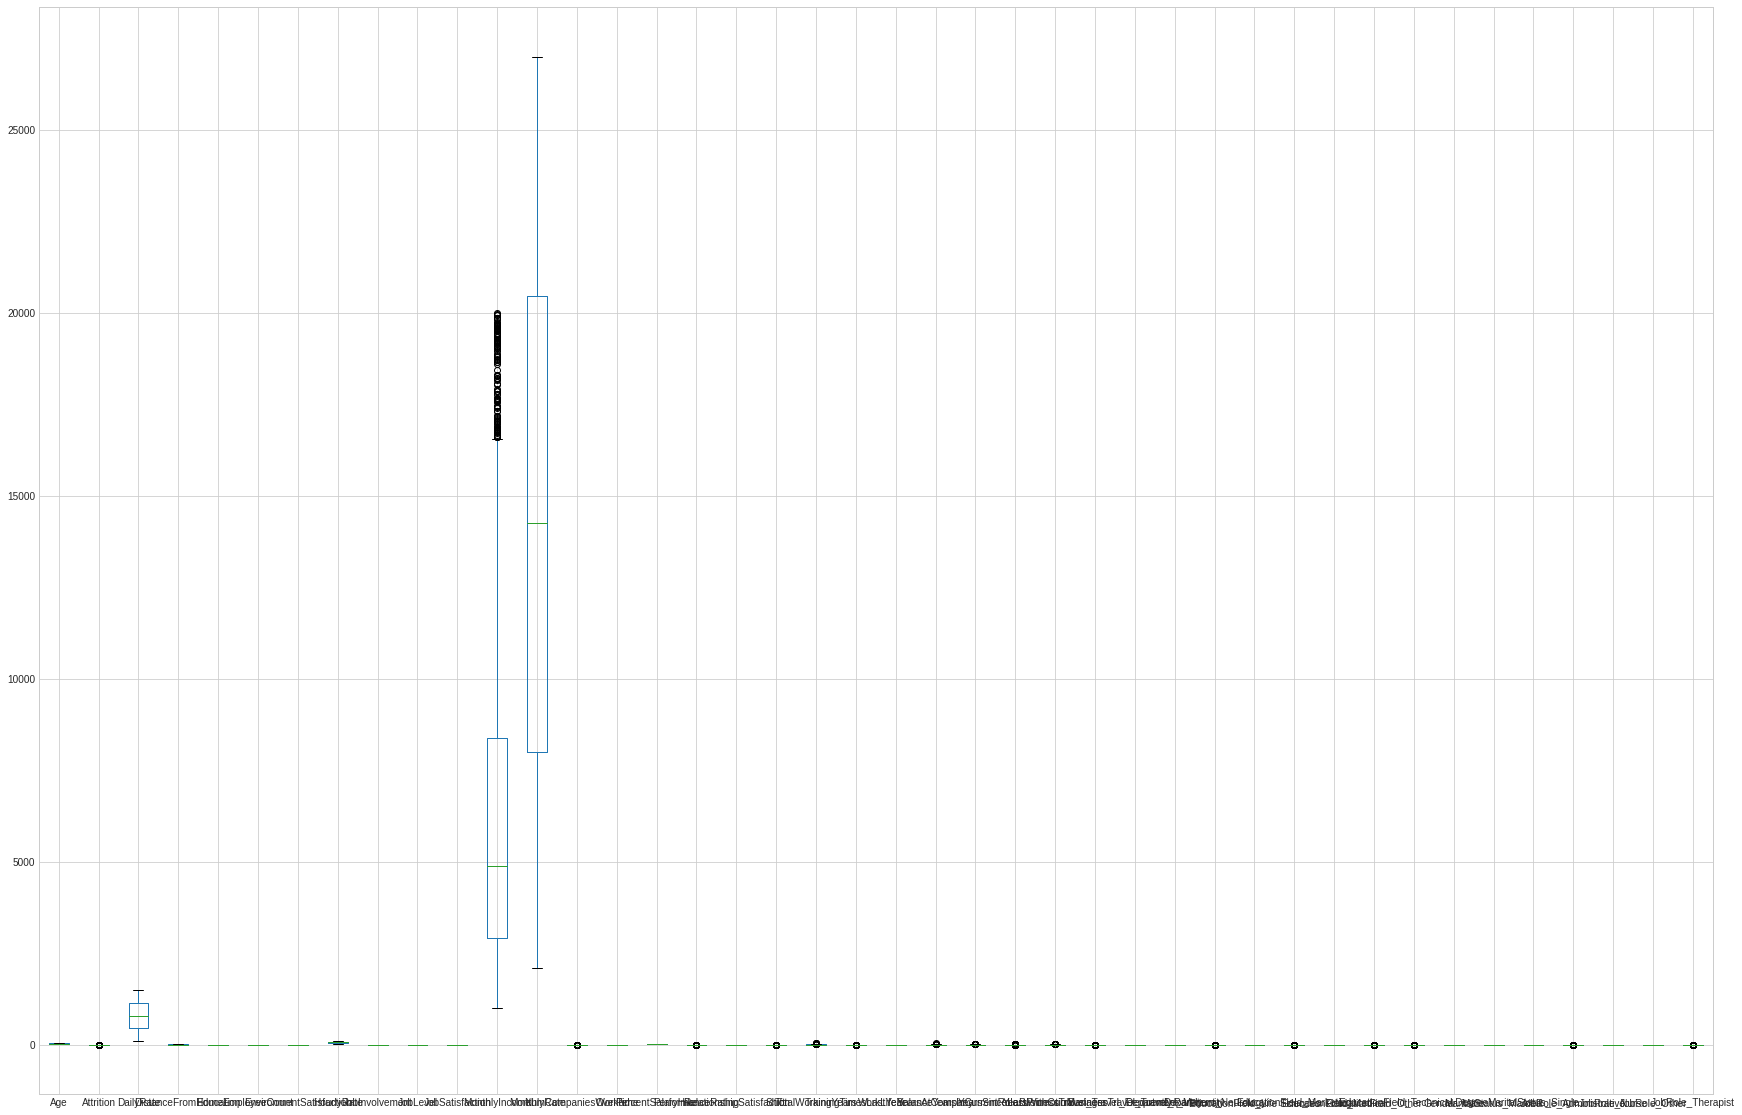

In [ ]:
#checking for outliers
boxplot = df.boxplot(figsize=(30,20))

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Make predictions using the training set
y_pred = regr.predict(x_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on training set =',r2)

Mean squared error: 0.07
Coefficient of determination: 0.33
R^2 score on training set = 0.3293723567888971


In [ ]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.07
Coefficient of determination: 0.32
R^2 score on test set = 0.3155851528061461


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)

20640
20640


In [12]:
#Impute the values using scikit-learn SimpleImpute Class

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)